In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

Saving application_record.csv to application_record.csv
Uploaded file: application_record.csv


In [3]:
df = pd.read_csv('application_record.csv')
print(df.head())
print("---------------------------------------------------------------")
print(df.info())
print("---------------------------------------------------------------")
print(df.describe())
print('---------------------------------------------------------------')
print(df.isnull().sum())
print("---------------------------------------------------------------")
print(df.nunique())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

In [4]:
#نجمع البايظ سوا
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent )

# ببدل ال unknown ب true
df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

# نتأكد ان التعديل تم
print(df.isnull().sum())

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.601039
CNT_FAM_MEMBERS         0.000000
dtype: float64
ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL      

<ipython-input-4-24f3db34cefa>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)


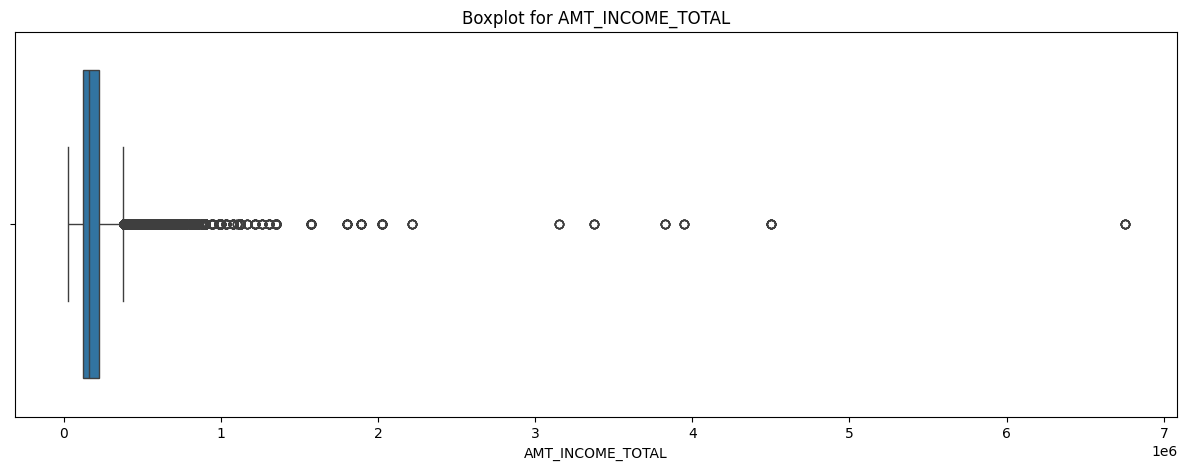

In [5]:
# نرسم
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['AMT_INCOME_TOTAL'])
plt.title('Boxplot for AMT_INCOME_TOTAL')
plt.show()

# نعالج البايظ
Q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# نحذف
df = df[(df['AMT_INCOME_TOTAL'] >= lower_bound) & (df['AMT_INCOME_TOTAL'] <= upper_bound)]

In [6]:
# نطبع ال object value
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
    print("-----------------------------------")

# نحولهم لارقام
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS']

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

CODE_GENDER: ['M' 'F']
-----------------------------------
FLAG_OWN_CAR: ['Y' 'N']
-----------------------------------
FLAG_OWN_REALTY: ['Y' 'N']
-----------------------------------
NAME_INCOME_TYPE: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
-----------------------------------
NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
-----------------------------------
NAME_FAMILY_STATUS: ['Married' 'Single / not married' 'Separated' 'Civil marriage' 'Widow']
-----------------------------------
NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
-----------------------------------
OCCUPATION_TYPE: ['Security staff' 'Sales staff' 'Unknown' 'Accountants' 'Laborers'
 'Drivers' 'Core staff' 'Managers' 'High skill tech staff'
 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'M

In [7]:
# نحول العمر من ايام وسوالب لسنين
df['AGE'] = (-df['DAYS_BIRTH']) / 365

# نحول عدد سنين الشغل كمان
df['YEARS_EMPLOYED'] = (-df['DAYS_EMPLOYED'] )/ 365
df.loc[df['YEARS_EMPLOYED'] > 100, 'YEARS_EMPLOYED'] = np.nan # نبدل اللي مش منطقي ب nan
df['YEARS_EMPLOYED'].fillna(0, inplace=True)  # ونبدل الاصفار

# نحذف الاصل
df.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)

<ipython-input-7-0cdcba3bfd84>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YEARS_EMPLOYED'].fillna(0, inplace=True)  # ونبدل الاصفار


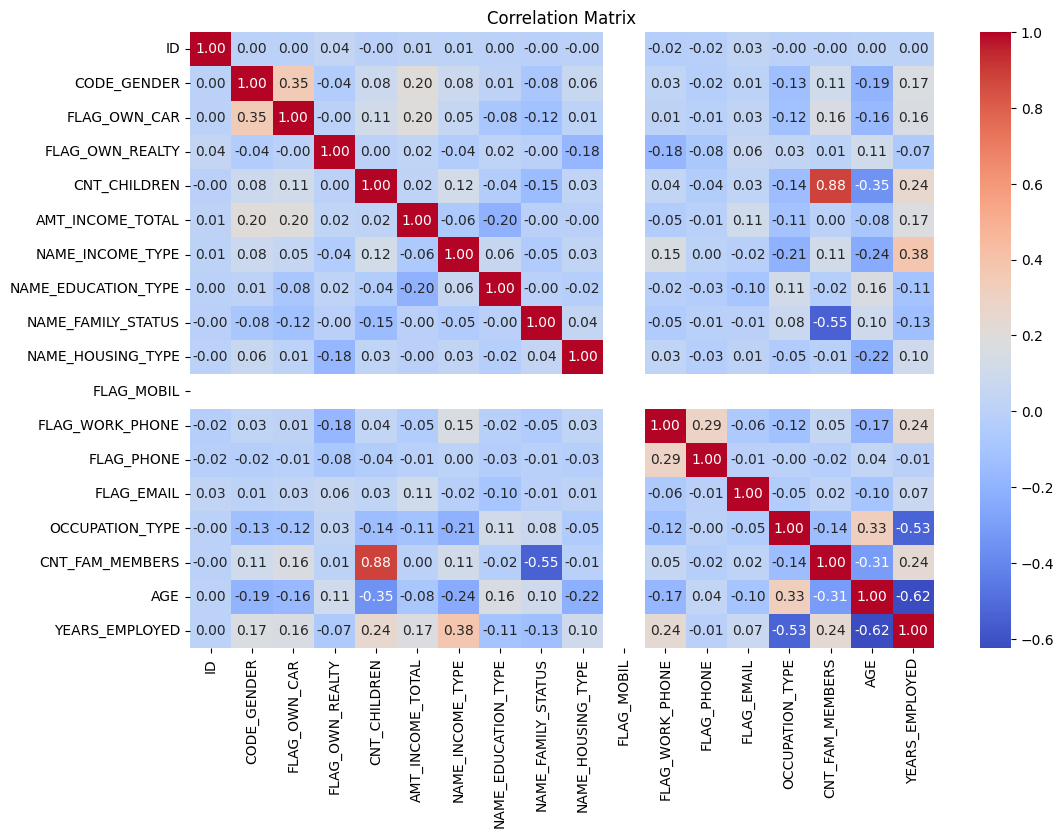

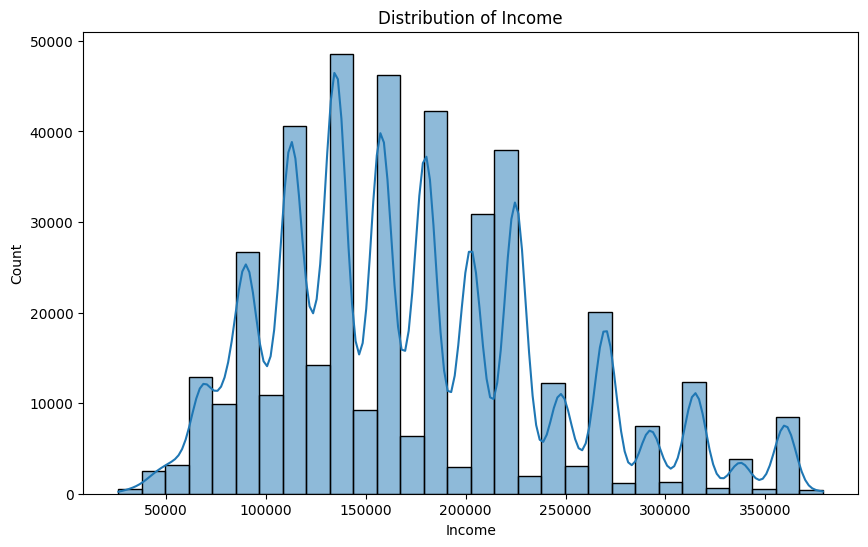

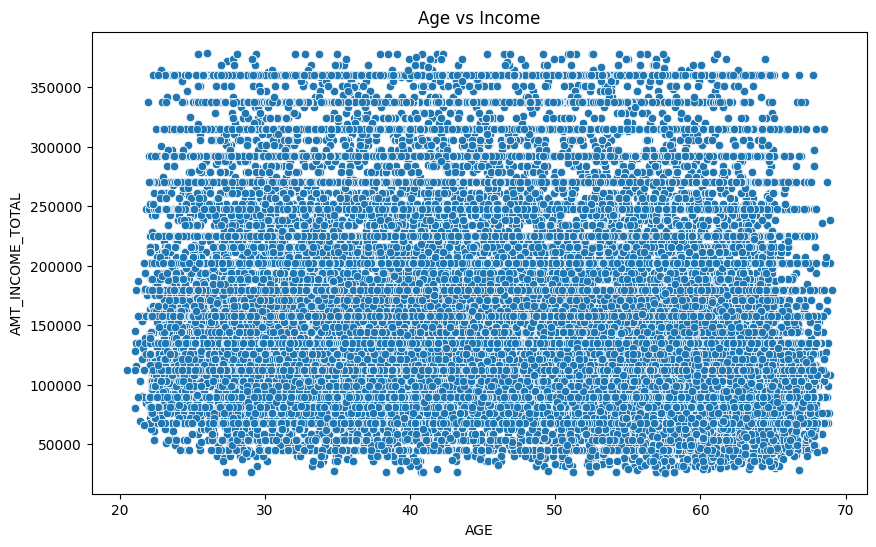

In [8]:
# نرسم
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# احصائيه بين كل عمود والتاني

# نحلل
plt.figure(figsize=(10, 6))
sns.histplot(df['AMT_INCOME_TOTAL'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()
# علشان اعرف الدنيا ماشية طبيعي ولا في خلل في اي account

# relation between age , income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='AMT_INCOME_TOTAL', data=df)
plt.title('Age vs Income')
plt.show()

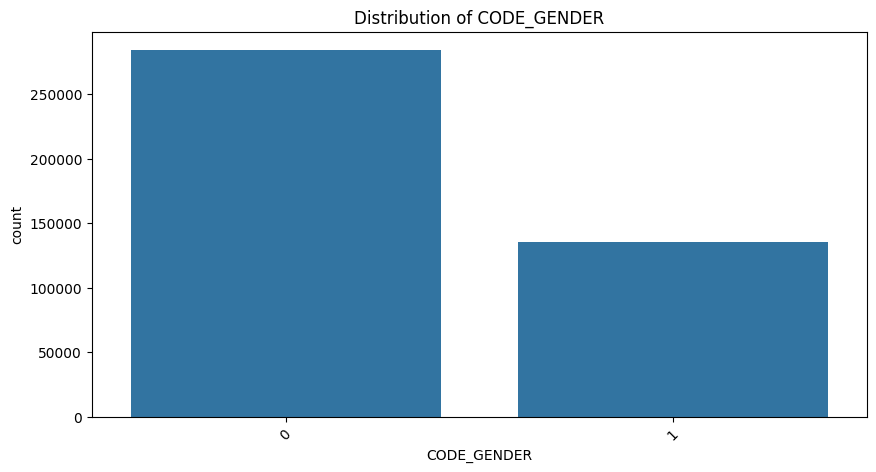

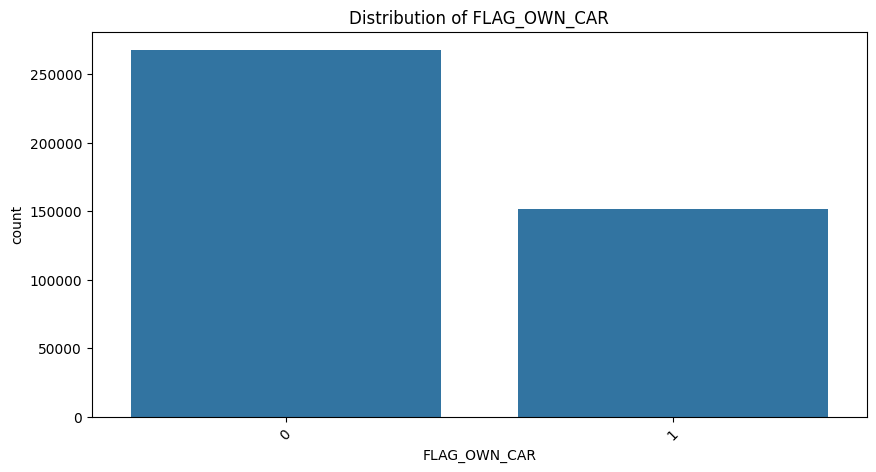

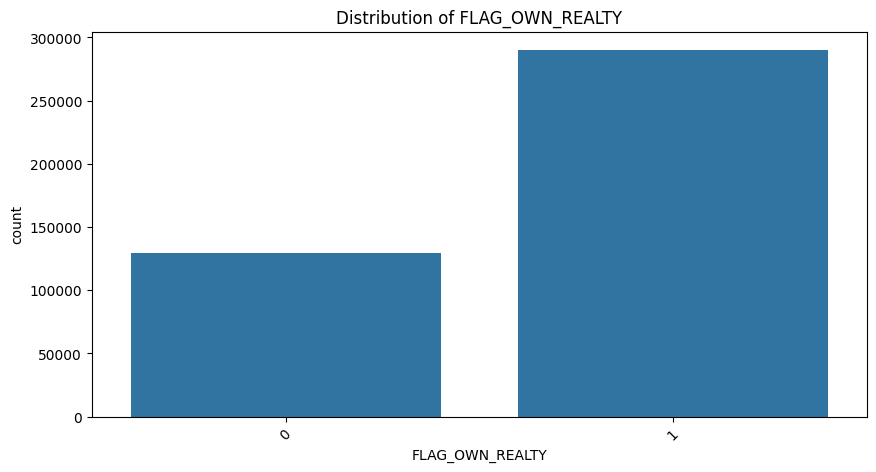

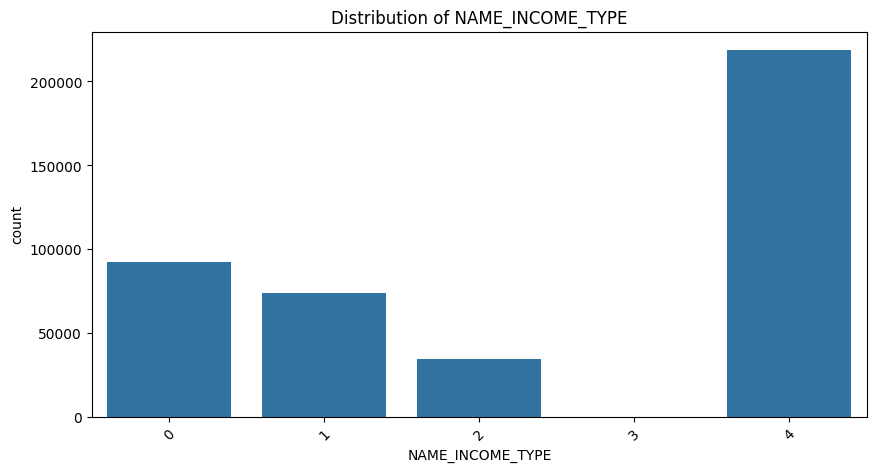

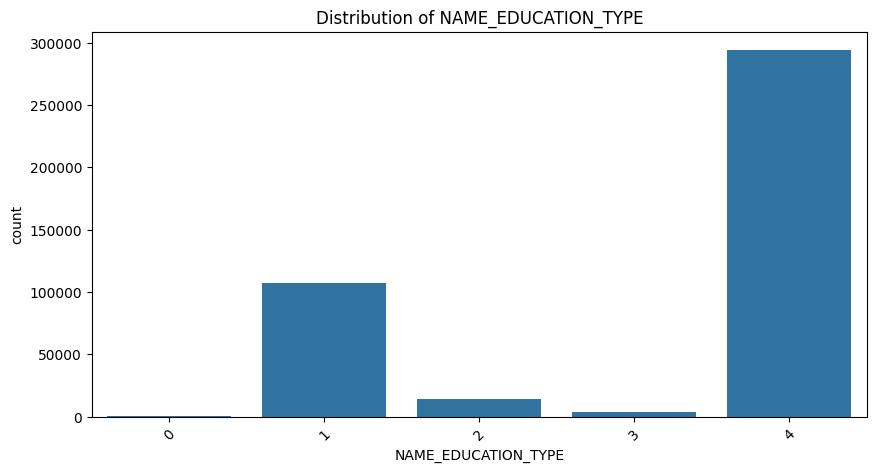

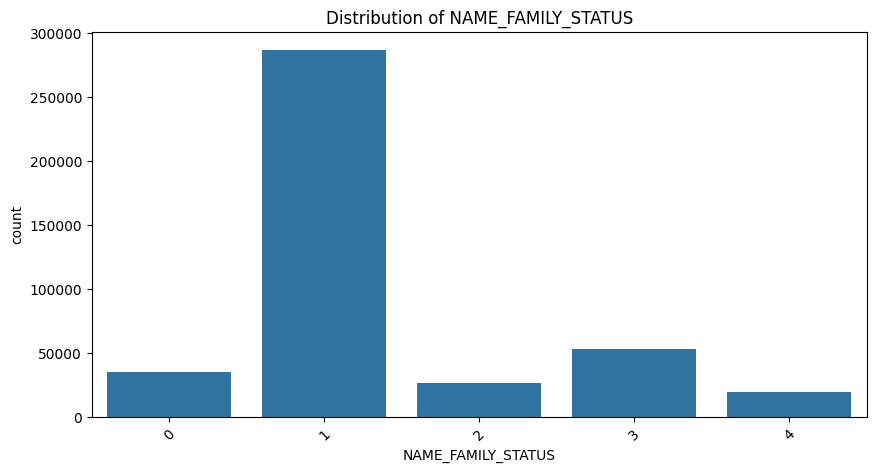

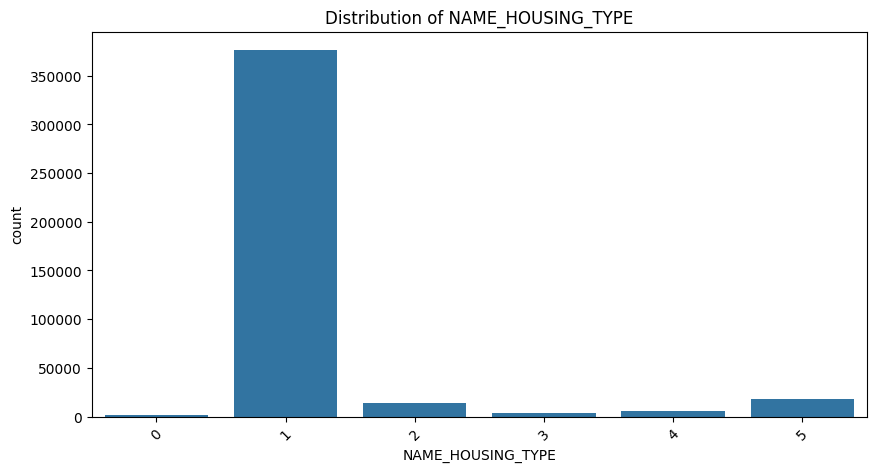

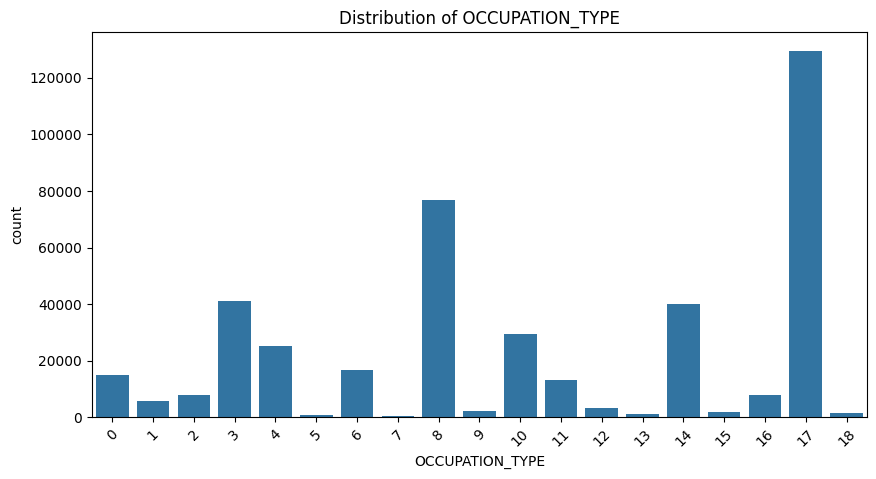

In [9]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
    # علشان اعرف مين اكتر فئه مسيطرة واقدر استبعد مين

In [10]:
# دمج القليلين في خانه واحده "Other"
threshold = 0.05  # أي فئة نسبتها أقل من 5% هتتدمج
total_rows = len(df)

for col in categorical_cols:
    value_counts = df[col].value_counts(normalize=True)  # نحسب النسبة المئوية
    to_replace = value_counts[value_counts < threshold].index  # الفئات اللي أقل من 5%
    if len(to_replace) > 0:
        print(f"\n in '{col}' will be merged into: 'Other':")
        print(list(to_replace))
        df[col] = df[col].replace(to_replace, 'Other')




 in 'NAME_INCOME_TYPE' will be merged into: 'Other':
[3]

 in 'NAME_EDUCATION_TYPE' will be merged into: 'Other':
[2, 3, 0]

 in 'NAME_FAMILY_STATUS' will be merged into: 'Other':
[4]

 in 'NAME_HOUSING_TYPE' will be merged into: 'Other':
[5, 2, 4, 3, 0]

 in 'OCCUPATION_TYPE' will be merged into: 'Other':
[6, 0, 11, 2, 16, 1, 12, 9, 15, 18, 13, 5, 7]


In [11]:
# Replace 'Other' with a numerical value before converting to int
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].replace('Other', -1)
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].astype('int')

df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].replace('Other', -1)
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].astype('int')

df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].replace('Other', -1)
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].astype('int')

df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].replace('Other', -1)
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].astype('int')

df['NAME_FAMILY_STATUS'] = df['NAME_HOUSING_TYPE'].replace('Other', -1)
df['NAME_FAMILY_STATUS'] = df['NAME_HOUSING_TYPE'].astype('int')

<ipython-input-11-c54b4d6fde9f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].replace('Other', -1)
<ipython-input-11-c54b4d6fde9f>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].replace('Other', -1)
<ipython-input-11-c54b4d6fde9f>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in t

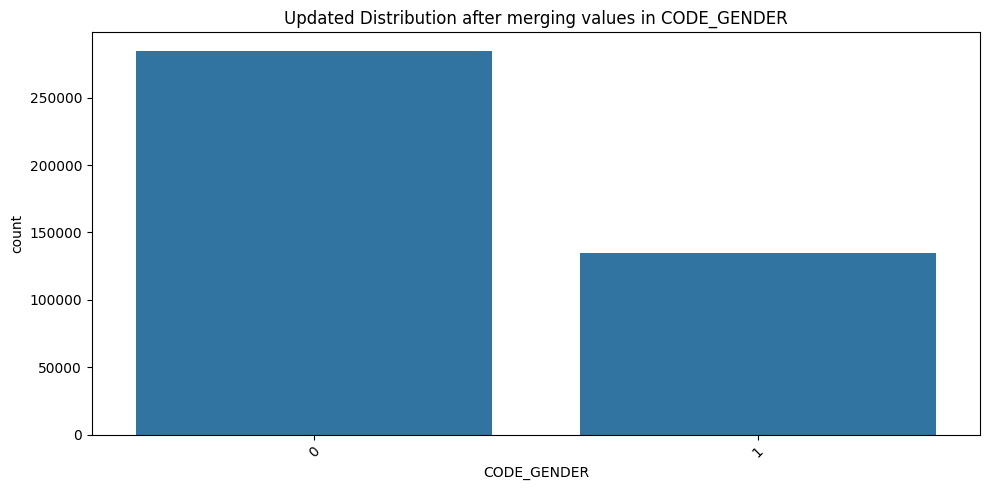

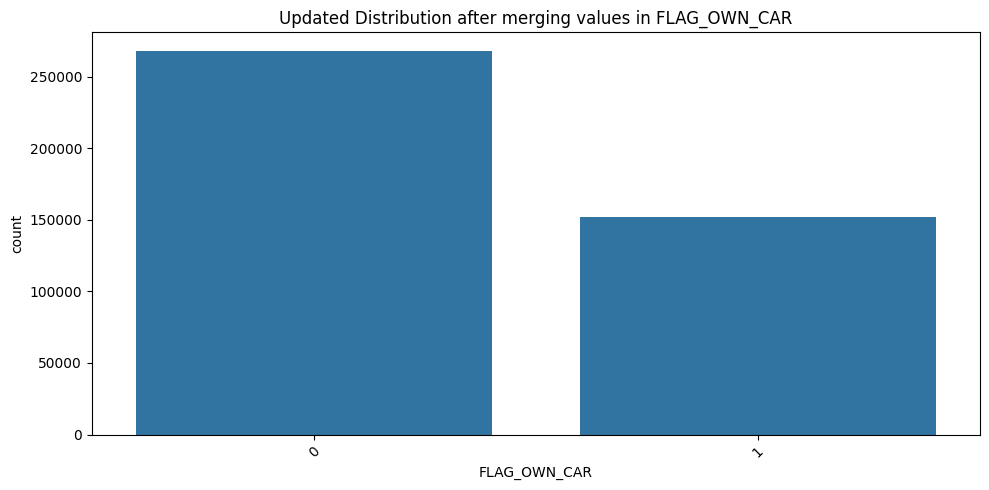

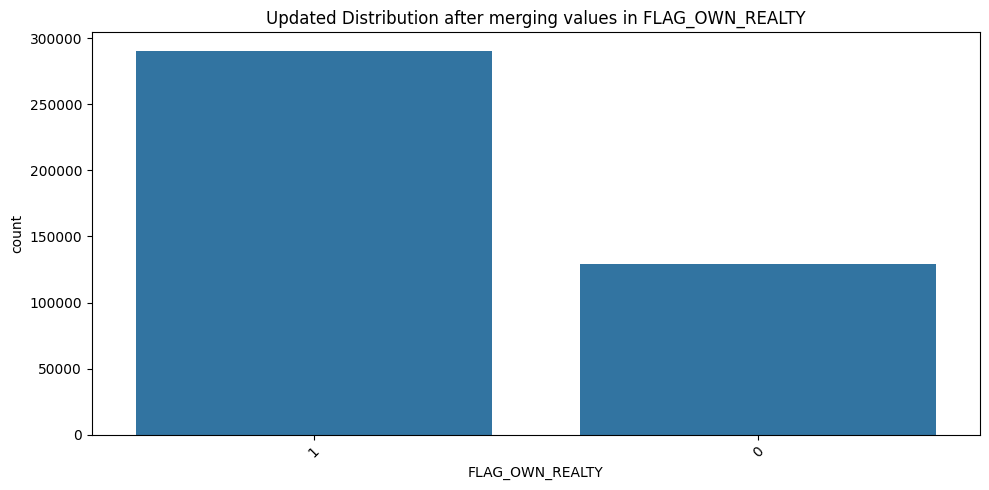

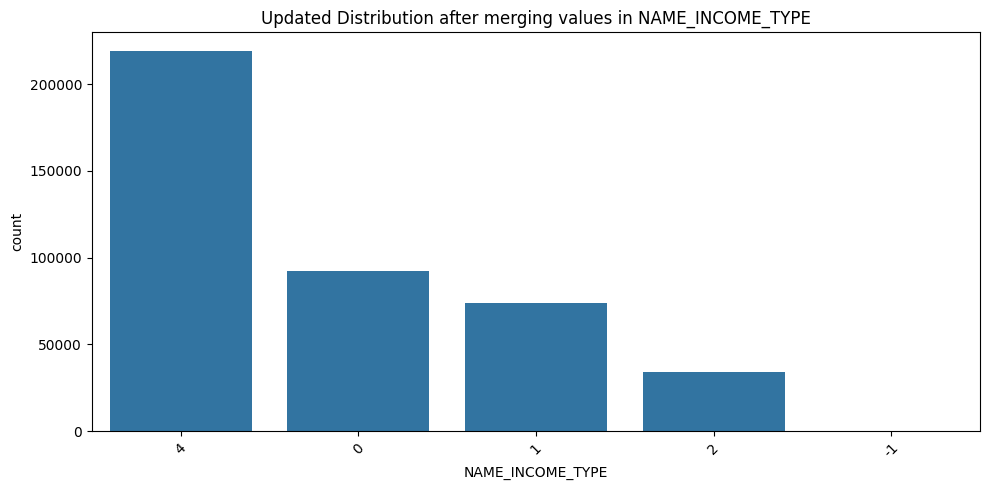

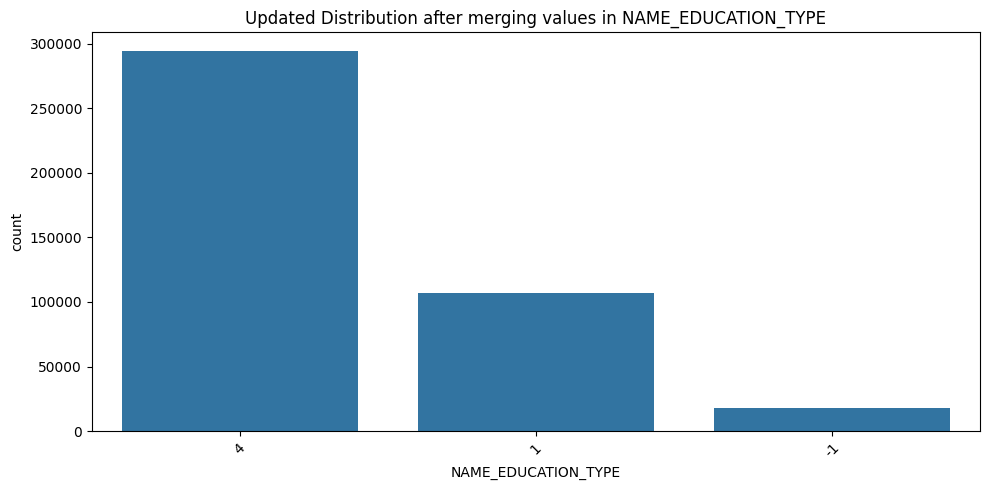

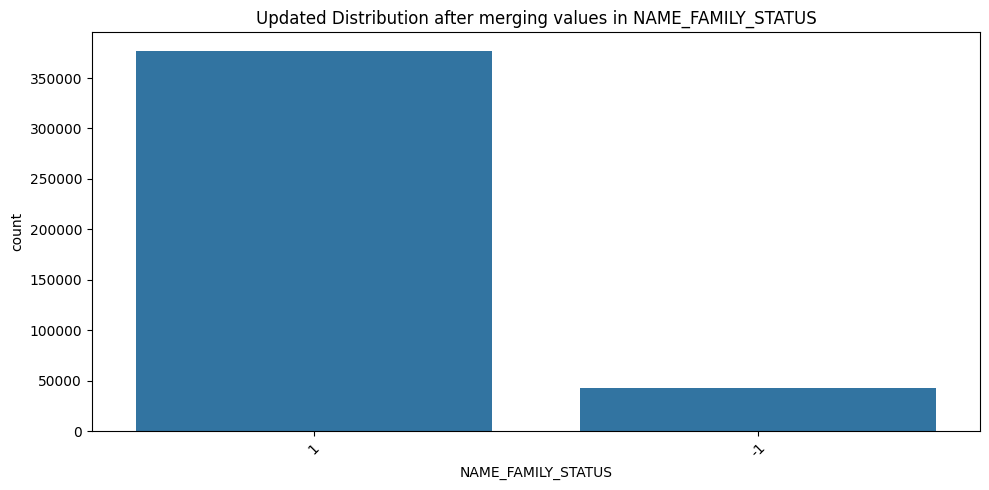

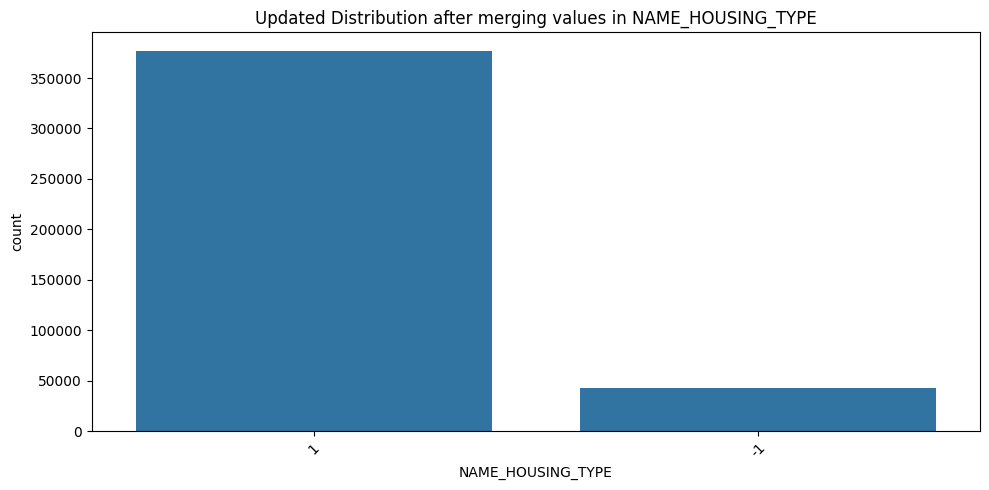

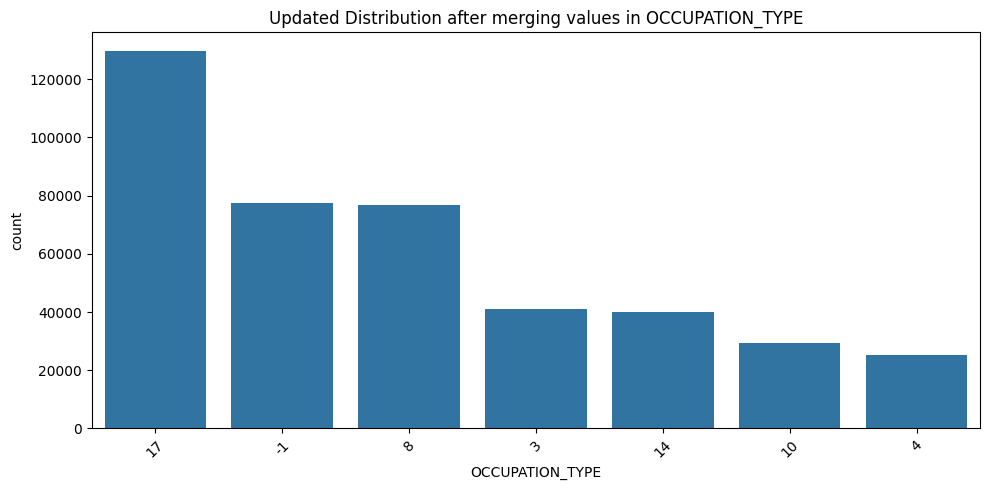

In [12]:
# الرسومات البيانية بعد التعديل
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Updated Distribution after merging values in {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

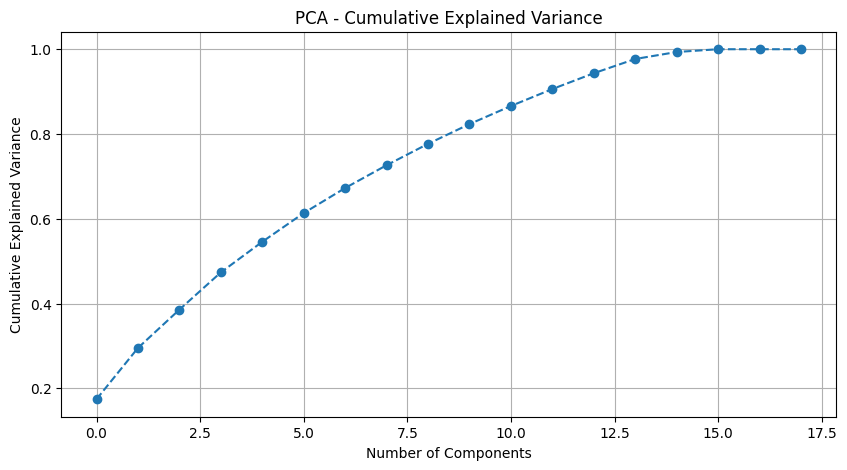

  PCA Component  Explained Variance Ratio  Cumulative Variance
0           PC1                  0.174209             0.174209
1           PC2                  0.120905             0.295114
2           PC3                  0.090464             0.385578
3           PC4                  0.087864             0.473442
4           PC5                  0.072215             0.545657
5           PC6                  0.067775             0.613432
6           PC7                  0.059126             0.672558
7           PC8                  0.053787             0.726345
8           PC9                  0.050451             0.776796
9          PC10                  0.046565             0.823362

 Number of dimensions after reduction: 12
Before: (419449, 18) -> After : (419449, 12)


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# بختار الارقام بس
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_cols]

# علشان نخليهم قد بعض Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# نحسب الفرق
explained_variance = pca.explained_variance_ratio_

# نرسم بقى
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

# جدول بقى
pca_df = pd.DataFrame({
    'PCA Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': np.cumsum(explained_variance)
})

print(pca_df.head(10))

n_components = np.argmax(np.cumsum(explained_variance) >= 0.90) + 1
X_pca_reduced = X_pca[:, :n_components]

print(f"\n Number of dimensions after reduction: {n_components}")
print(f"Before: {X.shape} -> After : {X_pca_reduced.shape}")


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419449 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   419449 non-null  int64  
 1   CODE_GENDER          419449 non-null  int64  
 2   FLAG_OWN_CAR         419449 non-null  int64  
 3   FLAG_OWN_REALTY      419449 non-null  int64  
 4   CNT_CHILDREN         419449 non-null  int64  
 5   AMT_INCOME_TOTAL     419449 non-null  float64
 6   NAME_INCOME_TYPE     419449 non-null  int64  
 7   NAME_EDUCATION_TYPE  419449 non-null  int64  
 8   NAME_FAMILY_STATUS   419449 non-null  int64  
 9   NAME_HOUSING_TYPE    419449 non-null  int64  
 10  FLAG_MOBIL           419449 non-null  int64  
 11  FLAG_WORK_PHONE      419449 non-null  int64  
 12  FLAG_PHONE           419449 non-null  int64  
 13  FLAG_EMAIL           419449 non-null  int64  
 14  OCCUPATION_TYPE      419449 non-null  int64  
 15  CNT_FAM_MEMBERS      4

In [15]:
# نـsave الجديد
df.to_csv('cleaned_application_record.csv', index=False)

In [16]:
# علشان ينزل علي الجهاز عندنا
files.download('cleaned_application_record.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>